### **Limpieza de datos** 
✨ *Prof. O. Pinzón* ✨

Este Notebook de Jupyter está enfocado en la limpieza de datos usando **pandas**. La idea es revisr los comandos presentados en clase, probarlos en este Notebook para aplicarlos con un dataset real que contenga errores comunes, como valores faltantes, datos duplicados y formatos inconsistentes.  

#### **Objetivo**  
Aplicar técnicas de limpieza de datos utilizando pandas en Python para mejorar la calidad de los datos y prepararlos para su análisis.  

#### **Contenido**  

1. **Carga del Dataset**  
   - Instrucciones para importar pandas y cargar el dataset en un DataFrame.  
   - Revisión inicial del dataset (`df.head()`, `df.info()`, `df.describe()`).  

2. **Detección y Manejo de Valores Faltantes**  
   - Identificación de valores nulos (`df.isnull().sum()`).  
   - Estrategias para manejar datos faltantes: eliminación de filas/columnas, imputación con la media, moda, o métodos avanzados.  

3. **Identificación y Eliminación de Datos Duplicados**  
   - Uso de `df.duplicated()` y `df.drop_duplicates()`.  

4. **Corrección de Errores en Formatos de Datos**  
   - Conversión de tipos de datos (`astype()`, `pd.to_datetime()`).  
   - Normalización de texto (`str.lower()`, `str.strip()`).  

5. **Detección y Tratamiento de Valores Atípicos**  
   - Uso de diagramas de caja (`boxplot`) para identificar outliers.  
   - Métodos de eliminación o transformación de valores extremos.  

#

![separator1](https://i.imgur.com/ZUWYTii.png)

#### **1. Carga del Dataset**  
   - Instrucciones para importar pandas y cargar el dataset en un DataFrame.  
   - Revisión inicial del dataset (`df.head()`, `df.info()`, `df.describe()`).  

In [1]:
import pandas as pd

# Cargar el dataset en un DataFrame
df = pd.read_csv('data/btc-eth-prices-original.csv')

# Revisión inicial del dataset
display(df.head())
print('-----------------------------------')

# Revisión inicial del dataset
df.info()
print('-----------------------------------')

# Revisión inicial del dataset
df.describe()


,Timestamp,Bitcoin,Ether
0,2017-04-02,1099.169125,48.55
1,2017-04-03,1141.813000,44.13
2,2017-04-04,1141.600363,44.43
3,2017-04-05,1133.079314,44.90
4,2017-04-06,1196.307937,43.23


-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Bitcoin    365 non-null    float64
 2   Ether      362 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB
-----------------------------------


,Bitcoin,Ether
count,365.000000,362.000000
mean,6359.574241,429.927514
std,4528.878870,308.254288
min,1099.169125,42.310000
25%,2585.349186,238.525000
50%,4594.987850,308.825000
75%,9182.843333,657.502500
max,19498.683333,1385.020000


   - ✅ El método `df.head()` muestra las primeras filas del DataFrame, lo cual es útil para obtener una vista previa de los datos.  
   - 🔍 Podría ser útil especificar el número de filas a visualizar (`df.head(10)`) en caso de que las primeras cinco no sean representativas.  
   
   - ✅ El método `df.info()` proporciona un resumen de la estructura del DataFrame, incluyendo el número de filas y columnas, los tipos de datos y los valores nulos.  
   - ⚠️ No es necesario usar `print()`, ya que `df.info()` ya imprime la salida. 

   - ✅ El método `df.describe()` genera estadísticas descriptivas de las columnas numéricas.  
   - 🔍 Si el dataset tiene columnas categóricas, se podría usar `df.describe(include='all')` para incluirlas en el análisis.

![separator1](https://i.imgur.com/ZUWYTii.png)

#### **2. Detección y Manejo de Valores Faltantes**  
   - Identificación de valores nulos (`df.isnull().sum()`).  
   - Estrategias para manejar datos faltantes: eliminación de filas/columnas, imputación con la media, moda, o métodos avanzados.

In [2]:
# Identificación de valores nulos
valores_nulos = df.isnull().sum()
print(valores_nulos)
print('-----------------------------------')

# Ver las filas con valor nulo verdadero
print(df.isnull().loc[250:252,:])
print('-----------------------------------')

# Ver las filas con valores nulos
df_nulos = df[df.isnull().any(axis=1)] # Verifica si hay algún valor verdadero en cada fila
display(df_nulos)

Timestamp    0
Bitcoin      0
Ether        3
dtype: int64
-----------------------------------
     Timestamp  Bitcoin  Ether
250      False    False   True
251      False    False   True
252      False    False   True
-----------------------------------


,Timestamp,Bitcoin,Ether
250,2017-12-08,16007.436667,NaN
251,2017-12-09,15142.834152,NaN
252,2017-12-10,14869.805000,NaN


In [3]:
# Eliminación de filas con valores nulos
df_sin_nulos = df.dropna()
print(df_sin_nulos.isnull().sum())

Timestamp    0
Bitcoin      0
Ether        0
dtype: int64


In [4]:
# Imputación de valores faltantes con la media
media = df.Ether.mean()
print(media)
df_imputado_media = df.fillna(media)

print('-----------------------------------')
display(df_imputado_media.loc[250:252])

429.9275138121547
-----------------------------------


,Timestamp,Bitcoin,Ether
250,2017-12-08,16007.436667,429.927514
251,2017-12-09,15142.834152,429.927514
252,2017-12-10,14869.805000,429.927514


En este ejemplo, primero se identifican los valores nulos en el DataFrame `df` usando `df.isnull().sum()`. Luego, se muestran tres estrategias para manejar los datos faltantes:

- ✅ Eliminación de filas con valores nulos usando `df.dropna()`.
- ✅ Imputación de valores faltantes con la media de la columna usando `df.fillna(df.mean())`.
- ✅ Imputación de valores faltantes con la moda de la columna usando `df.fillna(moda)`.


![separator1](https://i.imgur.com/ZUWYTii.png)

#### **3. Identificación y Eliminación de Datos Duplicados**  
   - Uso de `df.duplicated()` y `df.drop_duplicates()`.  

   Conceptualmente, los duplicados en un DataFrame ocurren a nivel de "fila". Dos filas con exactamente los mismos valores se consideran duplicados:

In [5]:
# Crea el dataframe con duplicados 
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

display(players) 

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


En el DataFrame anterior, se muestra claramente que **Kobe Bryant** está duplicado; pero aparece con dos posiciones diferentes. 

In [6]:
# Identificación de filas duplicadas
duplicados = players.duplicated()
print(duplicados)
print('-----------------------------------')

# Identificación de filas duplicadas por columna
duplicados = players.duplicated(subset=['Name'])
print(duplicados)
print('-----------------------------------')

# Se pueden aplicar reglas para decidir que duplicado quedarse. 
players.duplicated(subset=['Name'], keep='last') # Se queda con el último duplicado

0    False
1    False
2     True
3    False
4    False
dtype: bool
-----------------------------------
0    False
1    False
2     True
3    False
4     True
dtype: bool
-----------------------------------


0     True
1    False
2     True
3    False
4    False
dtype: bool

In [7]:
# Eliminación de filas duplicadas 
# Se realiza de la misma forma que el caso anterior
eliminados = players.drop_duplicates()
display(eliminados)
print('-----------------------------------')

# Eliminación de filas duplicadas por columna
eliminados = players.drop_duplicates(subset=['Name'])
display(eliminados)
print('-----------------------------------')

# Eliminación de filas duplicadas por columna conservando el último duplicado
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


-----------------------------------


,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


-----------------------------------


,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


En este ejemplo:
- ✅ Primero, se identifican las filas duplicadas usando `df.duplicated()`.
- ✅ Luego, se muestran las filas duplicadas.
- ✅Finalmente, se eliminan las filas duplicadas usando `df.drop_duplicates()`.

![separator1](https://i.imgur.com/ZUWYTii.png)

#### **4. Corrección de Errores en Formatos de Datos**  
   - Conversión de tipos de datos (`astype()`, `pd.to_datetime()`).  
   - Normalización de texto (`str.lower()`, `str.strip()`). 

In [8]:
# Este es un DataFrame de ejemplo con columnas de tipo string y numérico
df = pd.DataFrame({
    'Timestamp': ['2017-04-02', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06'],
    'Nombre': ['  Alice  ', '  Bob', 'Charlie  ', '  rincón', 'Eve  '],
    'Bitcoin': [1099.169125, 1141.813000, 1141.600363, 1133.079314, 1196.307937],
    'Ether': ['48.55', '44.13', '44.43', '44.90', '43.23']
})

# Mostrar el dataframe
display(df)
print('-----------------------------------')

# Verificar el tipo de dato de cada columna
print(df.dtypes)
print('-----------------------------------')

# Convertir la columna 'Timestamp' a tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Convertir la columna 'Nombre' a tipo string
df['Nombre'] = df['Nombre'].astype("string")

# Convertir la columna 'Ether' a tipo float
df['Ether'] = df['Ether'].astype(float)

# Verificar la conversión
print(df.dtypes)


,Timestamp,Nombre,Bitcoin,Ether
0,2017-04-02,Alice,1099.169125,48.55
1,2017-04-03,Bob,1141.813000,44.13
2,2017-04-04,Charlie,1141.600363,44.43
3,2017-04-05,rincón,1133.079314,44.90
4,2017-04-06,Eve,1196.307937,43.23


-----------------------------------
Timestamp     object
Nombre        object
Bitcoin      float64
Ether         object
dtype: object
-----------------------------------
Timestamp    datetime64[ns]
Nombre       string[python]
Bitcoin             float64
Ether               float64
dtype: object


In [9]:
# Eliminar espacios en blanco al inicio y al final de la columna 'Nombre'
# Muestra los espacios en blanco de cada registro
print(df['Nombre'])
print('-----------------------------------')

df['Nombre'] = df['Nombre'].str.strip() 
df['Nombre'] = df['Nombre'].str.capitalize()
print('-----------------------------------')    

# Verificar la eliminación de espacios en blanco
print(df['Nombre'])

0      Alice  
1          Bob
2    Charlie  
3       rincón
4        Eve  
Name: Nombre, dtype: string
-----------------------------------
-----------------------------------
0      Alice
1        Bob
2    Charlie
3     Rincón
4        Eve
Name: Nombre, dtype: string


In [10]:
# Normalizar nombres
# Convertir todo el texto a minúsculas
df['Nombre'] = df['Nombre'].str.lower()
display(df)
print('-----------------------------------')

# Convertir la primera letra de cada palabra a mayúscula
df['Nombre'] = df['Nombre'].str.strip().str.capitalize()
display(df)
print('-----------------------------------')

# Elimina los acentos de las letras
df['Nombre'] = df['Nombre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
display(df)

,Timestamp,Nombre,Bitcoin,Ether
0,2017-04-02,alice,1099.169125,48.55
1,2017-04-03,bob,1141.813000,44.13
2,2017-04-04,charlie,1141.600363,44.43
3,2017-04-05,rincón,1133.079314,44.90
4,2017-04-06,eve,1196.307937,43.23


-----------------------------------


,Timestamp,Nombre,Bitcoin,Ether
0,2017-04-02,Alice,1099.169125,48.55
1,2017-04-03,Bob,1141.813000,44.13
2,2017-04-04,Charlie,1141.600363,44.43
3,2017-04-05,Rincón,1133.079314,44.90
4,2017-04-06,Eve,1196.307937,43.23


-----------------------------------


,Timestamp,Nombre,Bitcoin,Ether
0,2017-04-02,Alice,1099.169125,48.55
1,2017-04-03,Bob,1141.813000,44.13
2,2017-04-04,Charlie,1141.600363,44.43
3,2017-04-05,Rincon,1133.079314,44.90
4,2017-04-06,Eve,1196.307937,43.23


![separator1](https://i.imgur.com/ZUWYTii.png)

#### **5. Detección y Tratamiento de Valores Atípicos**  
   - Uso de diagramas de caja (`boxplot`) para identificar outliers.  
   - Métodos de eliminación o transformación de valores extremos.  

In [11]:
import matplotlib.pyplot as plt

# Crear un nuevo DataFrame con datos que incluyan outliers
data_nueva = {
    'Nombre': ['Ana', 'Luis', 'Ana', 'Carlos', 'Luis', 'Pedro', 'Maria', 'Juan', 'Lucia', 'Miguel'],
    'Edad': [23, 34, 23, 45, 34, 80, 15, None, 23, 45],  # Incluyendo outliers en Edad
    'Ciudad': ['Madrid', 'Barcelona', 'Madrid', 'Sevilla', 'Barcelona', 'Valencia', 'Bilbao', 'Madrid', 'Sevilla', 'Barcelona']
}

df_nueva = pd.DataFrame(data_nueva)

print("Nuevo DataFrame con outliers:")
display(df_nueva)

Nuevo DataFrame con outliers:


,Nombre,Edad,Ciudad
0,Ana,23.0,Madrid
1,Luis,34.0,Barcelona
2,Ana,23.0,Madrid
3,Carlos,45.0,Sevilla
4,Luis,34.0,Barcelona
5,Pedro,80.0,Valencia
6,Maria,15.0,Bilbao
7,Juan,NaN,Madrid
8,Lucia,23.0,Sevilla
9,Miguel,45.0,Barcelona


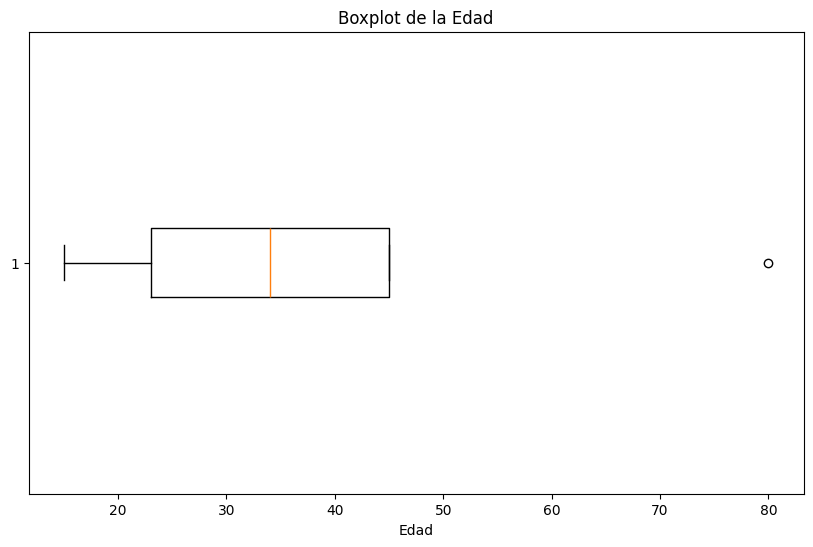

Límite inferior: -10.0
Límite superior: 78.0
-----------------------------------

Outliers detectados:


,Nombre,Edad,Ciudad
5,Pedro,80.0,Valencia


-----------------------------------

DataFrame outliers eliminados:


,Nombre,Edad,Ciudad
0,Ana,23.0,Madrid
1,Luis,34.0,Barcelona
2,Ana,23.0,Madrid
3,Carlos,45.0,Sevilla
4,Luis,34.0,Barcelona
6,Maria,15.0,Bilbao
8,Lucia,23.0,Sevilla
9,Miguel,45.0,Barcelona


In [12]:
# Asegurarse de que la columna 'Edad' no tenga valores perdidos antes de crear el boxplot
df_sin_perdidos = df_nueva.dropna(subset=['Edad'])

# Visualización de outliers con boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_sin_perdidos['Edad'], vert=False)
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

# Identificación de outliers usando el método del rango intercuartílico (IQR)
Q1 = df_sin_perdidos['Edad'].quantile(0.25)
Q3 = df_sin_perdidos['Edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print('-----------------------------------')

# Filtrar outliers
outliers = df_sin_perdidos[(df_sin_perdidos['Edad'] < lower_bound) | (df_sin_perdidos['Edad'] > upper_bound)]
print("\nOutliers detectados:")
display(outliers)
print('-----------------------------------')

# Eliminar outliers del DataFrame
df_sin_outliers = df_sin_perdidos[(df_sin_perdidos['Edad'] >= lower_bound) & (df_sin_perdidos['Edad'] <= upper_bound)]
print("\nDataFrame outliers eliminados:")
display(df_sin_outliers)

En esta sección, se ha logrado lo siguiente:

- ✅ **Visualización de Outliers**: Se utilizó un diagrama de caja (boxplot) para identificar visualmente los valores atípicos en la columna `Edad` del DataFrame `df_nueva`.

- ✅ **Identificación de Outliers**: Se aplicó el método del rango intercuartílico (IQR) para determinar los límites inferior y superior, y así identificar los valores atípicos en la columna `Edad`.

- ✅ **Filtrado de Outliers**: Se filtraron los valores atípicos del DataFrame `df_nueva` para obtener un nuevo DataFrame `df_sin_outliers` sin los valores extremos.

Estas técnicas permiten mejorar la calidad de los datos al identificar y tratar los valores atípicos, lo cual es fundamental para obtener análisis confiables.
